In [5]:
import os
import pandas as pd
import numpy as np
import Sprayer_PDE as SP

t = 0
time_start = pd.Timestamp('2022-09-18 00:00:00')
print(str(time_start + pd.Timedelta(pd.offsets.Second(t*60))))


grid_x = grid_y = 20 # x,y coordinate range
#网格范围 0 ~ grid_x, 0 ~ grid_y

initial_field = 20 * np.ones((grid_x, grid_y))\
                    + 0 * np.random.random((grid_x, grid_y))# randomly initialize "initial_field" map matrix around 100
#初始污染物分布，每个网格为250m x 250m，污染源单位PM2.5

R = - 6.2 * np.ones((grid_x, grid_y)) + 12 * np.random.random((grid_x, grid_y)) # initialize pollution resource map matrix
R[10][10] = 180
# R[17][17] = 200
R[3][17] = 150
# R[17][3] = 160
#污染源分布R，每个网格为250m x 250m
    
data_sprayer_train = []
# time_range = 100
# data_sprayer_train.append(pd.DataFrame({"time":range(t , t + time_range,10), "x":np.linspace(0,grid_x-grid_x/10,10),\
#                                         "y":np.linspace(0,grid_y-grid_y/10,10), "spray_volume":[5000 for i in range(10)]}))
data_sprayer_train.append(pd.DataFrame())
for i in range(10):
    for j in range(1):
        new_pd = pd.DataFrame({"time":i*10 + j, "x":i*grid_x/10,"y":i*grid_y/10, "spray_volume":3000},index=[0])
        data_sprayer_train[0] = pd.concat([data_sprayer_train[0],new_pd])
# for i in range(10):
#     for j in range(1):
#         new_pd = pd.DataFrame({"time":i*1 + j, "x":0,"y":0, "spray_volume":1500},index=[0])
#         data_sprayer_train[0] = pd.concat([data_sprayer_train[0],new_pd])
# data_sprayer_train.append(pd.DataFrame({"time":range(t , t + time_range), "x":np.linspace(grid_x,0,time_range),\
#                                         "y":np.linspace(grid_y,0,time_range), "spray_volume":[500 for i in range(time_range)]}))
#洒水车的轨迹和洒水量 (轨迹时间单位：min, 轨迹空间单位：百米（每个网格为250m x 250m）, 洒水量单位 L/min)
#每个洒水车对应一个data_sprayer_train[i]

model_test = SP.Diffusion_Model(x_range = grid_x, y_range = grid_y,\
                 initial_field = initial_field, R_field = R, data_sprayer_train = data_sprayer_train, t_start = 0) # build model
#x_range, y_range：空间网格大小
#initial_field：初始污染物分布，每个网格为100m x 100m，污染源单位PM2.5
#R_field：污染源分布R，每个网格为100m x 100m
#data_sprayer_train：每个洒水车对应一个data_sprayer_train[i]
#t_start：起始状态对应的时间，默认为0


2022-09-18 00:00:00


In [6]:
data_sprayer_train

[   time     x     y  spray_volume
 0     0  0.00  0.00          3000
 0    10  2.00  2.00          3000
 0    20  4.00  4.00          3000
 0    30  6.00  6.00          3000
 0    40  8.00  8.00          3000
 0    50 10.00 10.00          3000
 0    60 12.00 12.00          3000
 0    70 14.00 14.00          3000
 0    80 16.00 16.00          3000
 0    90 18.00 18.00          3000]

In [7]:
import time
data_show_matrix = []
time_count = time.time()
for i in range(0,100,5):
    data_show_matrix.append(model_test.solve(i))
    print("infer_time:%f"%(time.time() - time_count))
    time_count = time.time()
#分别推断10,20,30...的污染地图（单位：min）

0it [00:00, ?it/s]                


infer_time:0.009340


100%|██████████| 5.0/5.0 [00:00<00:00,  5.15it/s]    


infer_time:0.978076


100%|██████████| 10.0/10.0 [00:00<00:00, 12.77it/s]   


infer_time:0.787704


100%|██████████| 15.0/15.0 [00:01<00:00, 13.55it/s]   


infer_time:1.110631


100%|██████████| 20.0/20.0 [00:01<00:00, 13.65it/s]   


infer_time:1.467749


100%|██████████| 25.0/25.0 [00:01<00:00, 14.00it/s]   


infer_time:1.789881


100%|██████████| 30.0/30.0 [00:02<00:00, 14.21it/s]   


infer_time:2.114766


100%|██████████| 35.0/35.0 [00:02<00:00, 14.29it/s]   


infer_time:2.452642


100%|██████████| 40.0/40.0 [00:03<00:00, 13.07it/s]   


infer_time:3.064349


100%|██████████| 45.0/45.0 [00:03<00:00, 12.34it/s]   


infer_time:3.652205


100%|██████████| 50.0/50.0 [00:03<00:00, 13.44it/s]   


infer_time:3.724689


100%|██████████| 55.0/55.0 [00:04<00:00, 12.88it/s]   


infer_time:4.274980


100%|██████████| 60.0/60.0 [00:04<00:00, 13.25it/s]   


infer_time:4.531658


100%|██████████| 65.0/65.0 [00:04<00:00, 13.36it/s]   


infer_time:4.867729


100%|██████████| 70.0/70.0 [00:05<00:00, 12.84it/s]   


infer_time:5.455093


100%|██████████| 75.0/75.0 [00:05<00:00, 12.86it/s]   


infer_time:5.834865


100%|██████████| 80.0/80.0 [00:06<00:00, 11.99it/s]   


infer_time:6.676473


100%|██████████| 85.0/85.0 [00:06<00:00, 12.87it/s]   


infer_time:6.606032


100%|██████████| 90.0/90.0 [00:06<00:00, 14.46it/s]   


infer_time:6.226787


100%|██████████| 95.0/95.0 [00:07<00:00, 13.37it/s]   

infer_time:7.109913


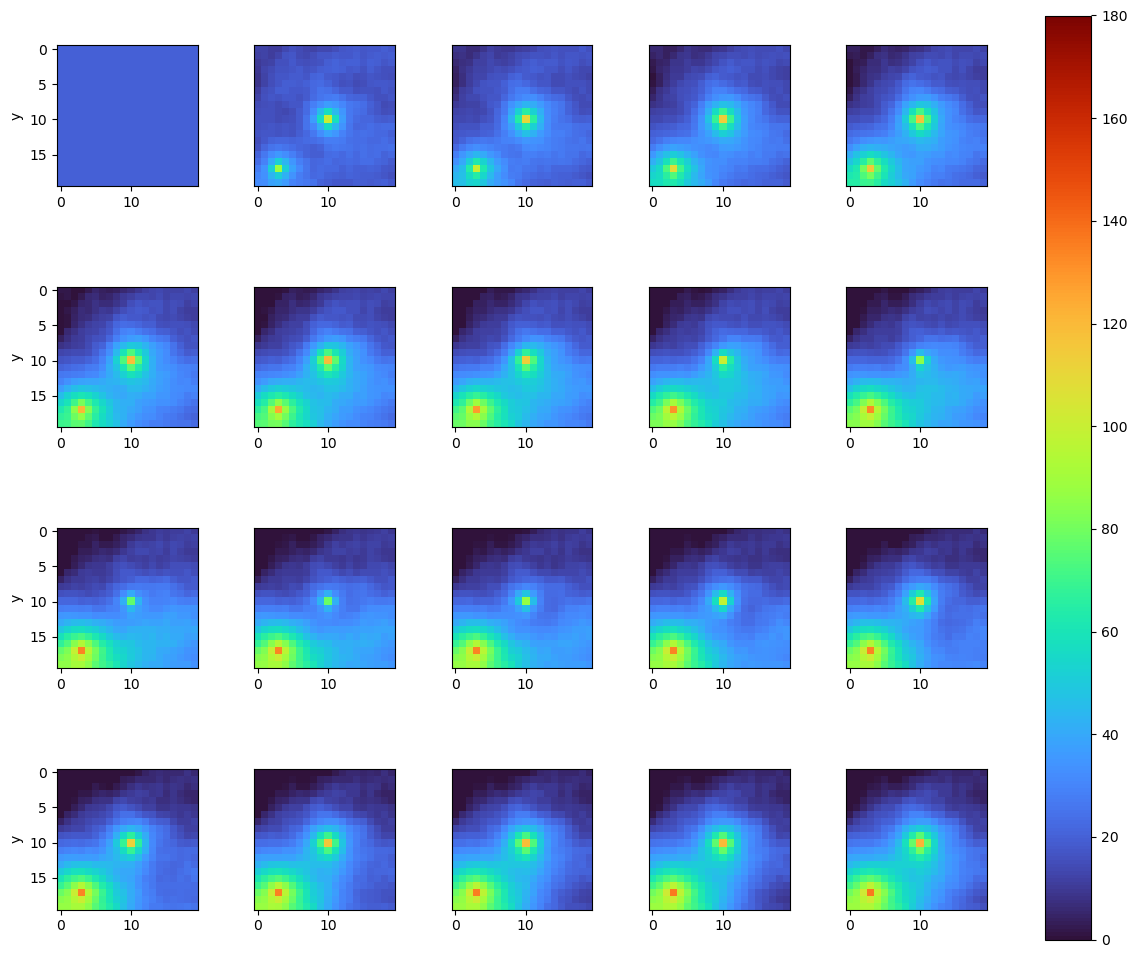

In [8]:
import matplotlib.pyplot as plt
show_range_z_score = 3
fig_size = 3
vmin = 0
vmax = 180
subfig_num = 20
test_show_row = 4
subfig_onerow = 5
fig, axes = plt.subplots(test_show_row, subfig_onerow, figsize=(fig_size * subfig_onerow, fig_size * test_show_row))
fig.subplots_adjust(wspace = 0.4, hspace = 0.2)
line_color = np.random.random(3)

for i in range(subfig_num):
    i_row = int(i / subfig_onerow)
    i_col = int(i % subfig_onerow)
#             ax = plt.subplot(test_show_row, subfig_onerow, i + 1, figsize=(10, 10))
    if i % subfig_onerow != 0:
        axes[i_row][i_col].yaxis.set_major_locator(plt.NullLocator())
    else:
        axes[i_row][i_col].set_ylabel("y")
    im = axes[i_row][i_col].imshow(np.matrix(data_show_matrix[i]).T, cmap='turbo',vmin = vmin, vmax = vmax)
fig.colorbar(im, ax=axes.ravel().tolist(), orientation="vertical")

#10,20,30...的污染地图的可视化（单位：min）

In [8]:
data_show_matrix[14]

array([[  3.36740138,   7.25002116,   7.24696583,   8.82116494,
          9.57359988,  10.74841027,  16.81508746,  18.85725354,
         22.02015151,  28.42166068,  35.75517226,  42.58766795,
         49.35458228,  57.03381145,  61.35016093,  68.70623759,
         80.26113878,  85.25850197,  90.82514914,  91.23438838],
       [  5.07414058,   8.58399513,   8.43733957,   8.79781511,
         10.78370268,  11.32253969,  17.73112749,  20.55767161,
         24.38214238,  30.84600904,  35.46021582,  39.22695522,
         46.68342156,  55.92229209,  61.62886453,  71.04331861,
         83.71285671,  92.04148513,  92.90380797,  94.32282149],
       [  8.68782243,   9.98225633,   9.95221653,   8.73892141,
          9.96615135,  11.85448566,  17.28707795,  22.70239724,
         25.48385691,  31.19924528,  34.18136824,  38.3818494 ,
         44.58345483,  54.31868466,  64.22027804,  74.11164893,
         89.72183016, 106.01019221, 100.74600453,  97.07422394],
       [ 12.11194986,  12.19112413,  